In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import random
random.seed(1429)

In [2]:
df=pd.read_csv("College_Admissions_Predict.csv")

In [3]:
df.isna().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [4]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

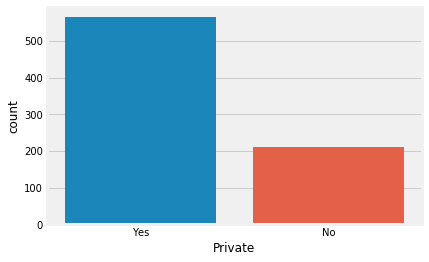

In [6]:
sns.countplot(df.Private)

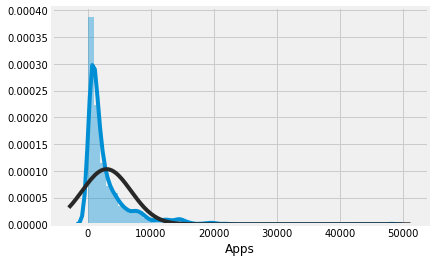

In [7]:
sns.distplot(df.Apps, fit=norm)

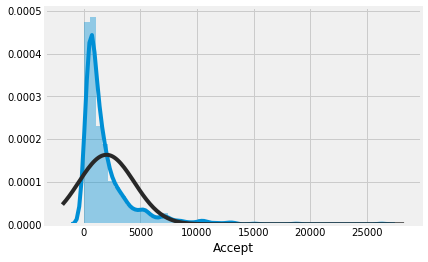

In [8]:
sns.distplot(df.Accept, fit=norm)

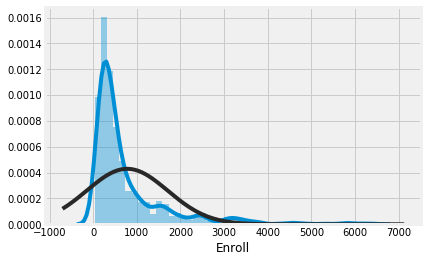

In [9]:
sns.distplot(df.Enroll, fit=norm)

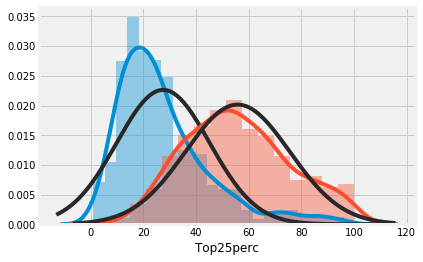

In [10]:
sns.distplot(df.Top10perc, fit=norm)
sns.distplot(df.Top25perc, fit=norm)

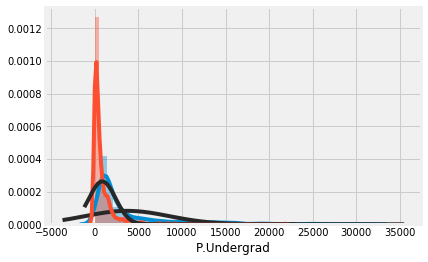

In [11]:
sns.distplot(df['F.Undergrad'], fit=norm)
sns.distplot(df['P.Undergrad'], fit=norm)

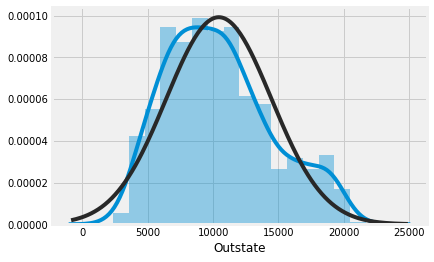

In [12]:
sns.distplot(df.Outstate, fit=norm)


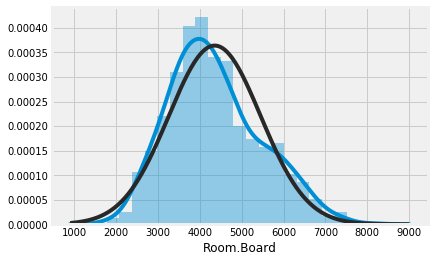

In [13]:
sns.distplot(df["Room.Board"], fit=norm)

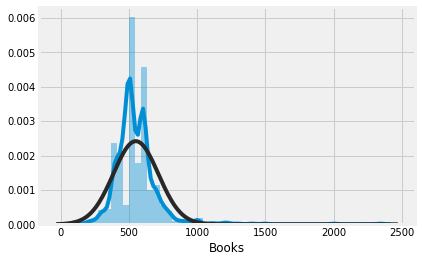

In [14]:
sns.distplot(df.Books, fit=norm)

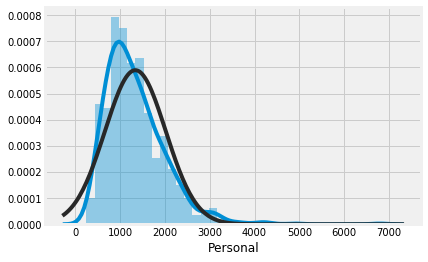

In [15]:
sns.distplot(df.Personal, fit=norm)

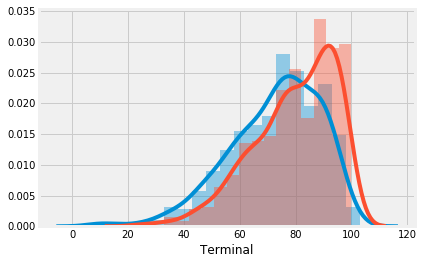

In [16]:
sns.distplot(df.PhD, )
sns.distplot(df.Terminal)

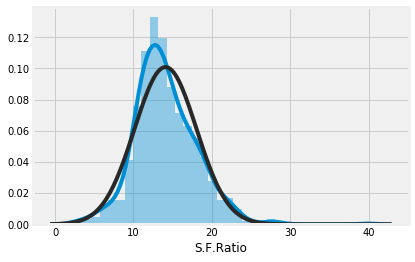

In [17]:
sns.distplot(df['S.F.Ratio'], fit=norm)

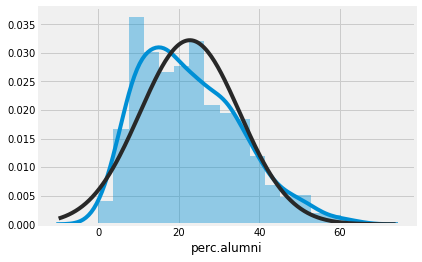

In [18]:
sns.distplot(df['perc.alumni'], fit=norm)

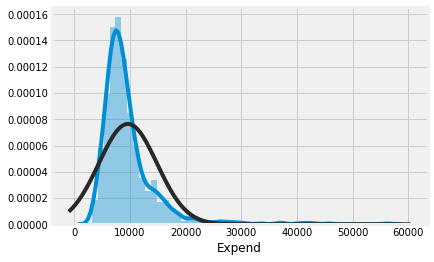

In [19]:
sns.distplot(df.Expend, fit=norm)

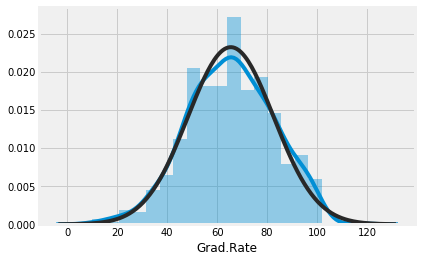

In [20]:
sns.distplot(df['Grad.Rate'], fit=norm)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import keras

Using TensorFlow backend.


In [22]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [23]:
classification=Sequential()

In [24]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [25]:
mapper={'Yes':1, 'No':0}

In [26]:
df.Private=df.Private.map(mapper)

In [27]:
X=df.loc[:,['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]
y=df.loc[:,'Private']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(ratio=1.0)

In [30]:
X_train_smt, y_train_smt= smt.fit_sample(X_train, y_train)

In [31]:
X_train_smt=pd.DataFrame(X_train_smt, columns=X.columns)

In [32]:
y_train_smt=pd.DataFrame(y_train_smt, columns=['Private'])

In [33]:
skl=StandardScaler()

In [34]:
X_train_skl=skl.fit_transform(X_train_smt)

In [35]:
X_test_skl=skl.transform(X_test)

In [36]:
X_train_skl=pd.DataFrame(X_train_skl, columns=X.columns)
X_test_skl=pd.DataFrame(X_test_skl, columns=X.columns)

adding input and hidden layer

In [37]:
classification.add(Dense(units=9,activation='relu', kernel_initializer='he_uniform', input_dim=17 ))

2nd hidden layer

In [38]:
classification.add(Dense(units=9,activation='relu', kernel_initializer='he_uniform' ))

output layer

In [39]:
classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='glorot_uniform' ))

compiling ANN / Schotastic Gradient Descent 'ADAMAX'

In [40]:
classification.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'] )

Inputting train set

In [41]:
classification.fit(X_train_skl, y_train_smt,epochs=100, batch_size=32 )

Epoch 1/100
912/912 [==============================] - 0s 135us/step - loss: 0.6821 - accuracy: 0.5735
Epoch 2/100
912/912 [==============================] - 0s 49us/step - loss: 0.5311 - accuracy: 0.7127
Epoch 3/100
912/912 [==============================] - 0s 48us/step - loss: 0.4480 - accuracy: 0.8224
Epoch 4/100
912/912 [==============================] - 0s 47us/step - loss: 0.3912 - accuracy: 0.8673
Epoch 5/100
912/912 [==============================] - 0s 48us/step - loss: 0.3490 - accuracy: 0.8893
Epoch 6/100
912/912 [==============================] - 0s 42us/step - loss: 0.3162 - accuracy: 0.9002
Epoch 7/100
912/912 [==============================] - 0s 38us/step - loss: 0.2896 - accuracy: 0.9090
Epoch 8/100
912/912 [==============================] - 0s 40us/step - loss: 0.2685 - accuracy: 0.9123
Epoch 9/100
912/912 [==============================] - 0s 38us/step - loss: 0.2510 - accuracy: 0.9200
Epoch 10/100
912/912 [==============================] - 0s 39us/step - loss: 0.23

912/912 [==============================] - 0s 41us/step - loss: 0.1096 - accuracy: 0.9671
Epoch 81/100
912/912 [==============================] - 0s 48us/step - loss: 0.1087 - accuracy: 0.9638
Epoch 82/100
912/912 [==============================] - 0s 45us/step - loss: 0.1082 - accuracy: 0.9671
Epoch 83/100
912/912 [==============================] - 0s 43us/step - loss: 0.1076 - accuracy: 0.9660
Epoch 84/100
912/912 [==============================] - 0s 74us/step - loss: 0.1078 - accuracy: 0.9616
Epoch 85/100
912/912 [==============================] - 0s 44us/step - loss: 0.1068 - accuracy: 0.9671
Epoch 86/100
912/912 [==============================] - 0s 50us/step - loss: 0.1065 - accuracy: 0.9649
Epoch 87/100
912/912 [==============================] - 0s 43us/step - loss: 0.1061 - accuracy: 0.9671
Epoch 88/100
912/912 [==============================] - 0s 40us/step - loss: 0.1057 - accuracy: 0.9671
Epoch 89/100
912/912 [==============================] - 0s 42us/step - loss: 0.1054 - 

In [42]:
pred=classification.predict(X_test_skl)

In [43]:
predited_class=[]
for i in pred:
    if i >0.5:
        predited_class.append(1)
    else:
        predited_class.append(0)

In [44]:
predited_class=pd.Series(predited_class)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,predited_class ))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        47
           1       0.96      0.91      0.93       109

    accuracy                           0.91       156
   macro avg       0.89      0.91      0.90       156
weighted avg       0.92      0.91      0.91       156



In [48]:
from keras.wrappers.scikit_learn import KerasClassifier

In [62]:
def classifier_ann():
    classification=Sequential()
    classification.add(Dense(units=9, input_dim=17,activation='relu', kernel_initializer='uniform'))
    classification.add(Dense(units=9,activation='relu', kernel_initializer='uniform'))
    classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='uniform'))
    classification.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    return classification

In [63]:
classifier=KerasClassifier(build_fn=classifier_ann,epochs=100, batch_size=32 )

In [64]:
cv_ann=cross_val_score(estimator=classifier,X=X_train_skl, y=y_train_smt, n_jobs=4, cv=10, verbose=1, scoring='accuracy' )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   20.6s finished


In [67]:
mean_cv_accuracy=np.mean(cv_ann)
std_cv_accuracy=np.std(cv_ann)
print(f' Mean CV accuracy is {mean_cv_accuracy :.2f} and standard dev of CV accuracy is {std_cv_accuracy :.2f}')

 Mean CV accuracy is 0.94 and standard dev of CV accuracy is 0.02


In [69]:
def classifier_ann(optimizer):
    classification=Sequential()
    classification.add(Dense(units=9, input_dim=17,activation='relu', kernel_initializer='uniform'))
    classification.add(Dropout(rate=0.6))
    classification.add(Dense(units=9,activation='relu', kernel_initializer='uniform'))
    classification.add(Dropout(rate=0.6))
    classification.add(Dense(units=1,activation='sigmoid', kernel_initializer='uniform'))
    classification.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classification

In [70]:
classifier=KerasClassifier(build_fn=classifier_ann)

In [71]:
param={'optimizer': ['Adamax','rmsprop'], 'batch_size':[32,64], 'epochs':[100,500]}

In [72]:
gd_cv_ann=GridSearchCV(estimator=classifier, param_grid=param,n_jobs=4, cv=10, scoring='accuracy', return_train_score=True)

In [74]:
gd_cv_ann.fit(X_train_skl, y_train_smt)

C:\Users\bishw\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/500
912/912 [==============================] - 0s 151us/step - loss: 0.6927 - accuracy: 0.5735
Epoch 2/500
912/912 [==============================] - 0s 23us/step - loss: 0.6893 - accuracy: 0.7478
Epoch 3/500
912/912 [==============================] - 0s 24us/step - loss: 0.6803 - accuracy: 0.7807
Epoch 4/500
912/912 [==============================] - 0s 24us/step - loss: 0.6649 - accuracy: 0.8048
Epoch 5/500
912/912 [==============================] - 0s 27us/step - loss: 0.6458 - accuracy: 0.8224
Epoch 6/500
912/912 [==============================] - 0s 23us/step - loss: 0.6187 - accuracy: 0.8213
Epoch 7/500
912/912 [==============================] - 0s 23us/step - loss: 0.5912 - accuracy: 0.8311
Epoch 8/500
912/912 [==============================] - 0s 21us/step - loss: 0.5640 - accuracy: 0.8531
Epoch 9/500
912/912 [==============================] - 0s 20us/step - loss: 0.5291 - accuracy: 0.8366
Epoch 10/500
912/912 [==============================] - ETA: 0s - loss: 0.5330 - 

912/912 [==============================] - 0s 20us/step - loss: 0.3069 - accuracy: 0.8860
Epoch 76/500
912/912 [==============================] - 0s 17us/step - loss: 0.3006 - accuracy: 0.8827
Epoch 77/500
912/912 [==============================] - 0s 16us/step - loss: 0.3135 - accuracy: 0.8980
Epoch 78/500
912/912 [==============================] - 0s 20us/step - loss: 0.3150 - accuracy: 0.8849
Epoch 79/500
912/912 [==============================] - 0s 16us/step - loss: 0.3009 - accuracy: 0.8805
Epoch 80/500
912/912 [==============================] - 0s 17us/step - loss: 0.2938 - accuracy: 0.8827
Epoch 81/500
912/912 [==============================] - 0s 16us/step - loss: 0.3138 - accuracy: 0.8936
Epoch 82/500
912/912 [==============================] - 0s 16us/step - loss: 0.3420 - accuracy: 0.8991
Epoch 83/500
912/912 [==============================] - 0s 17us/step - loss: 0.2908 - accuracy: 0.8893
Epoch 84/500
912/912 [==============================] - 0s 19us/step - loss: 0.2834 - 

912/912 [==============================] - 0s 19us/step - loss: 0.2821 - accuracy: 0.8947
Epoch 154/500
912/912 [==============================] - 0s 19us/step - loss: 0.2694 - accuracy: 0.8936
Epoch 155/500
912/912 [==============================] - 0s 19us/step - loss: 0.3059 - accuracy: 0.8816
Epoch 156/500
912/912 [==============================] - 0s 20us/step - loss: 0.2918 - accuracy: 0.8991
Epoch 157/500
912/912 [==============================] - 0s 17us/step - loss: 0.3309 - accuracy: 0.8958
Epoch 158/500
912/912 [==============================] - 0s 21us/step - loss: 0.3022 - accuracy: 0.8904
Epoch 159/500
912/912 [==============================] - 0s 20us/step - loss: 0.3197 - accuracy: 0.8882
Epoch 160/500
912/912 [==============================] - 0s 19us/step - loss: 0.2999 - accuracy: 0.8871
Epoch 161/500
912/912 [==============================] - 0s 19us/step - loss: 0.2823 - accuracy: 0.8904
Epoch 162/500
912/912 [==============================] - 0s 19us/step - loss: 

912/912 [==============================] - 0s 21us/step - loss: 0.2800 - accuracy: 0.8958
Epoch 232/500
912/912 [==============================] - 0s 20us/step - loss: 0.2855 - accuracy: 0.8838
Epoch 233/500
912/912 [==============================] - 0s 20us/step - loss: 0.3136 - accuracy: 0.8816
Epoch 234/500
912/912 [==============================] - 0s 20us/step - loss: 0.3047 - accuracy: 0.8991
Epoch 235/500
912/912 [==============================] - 0s 19us/step - loss: 0.3015 - accuracy: 0.8904
Epoch 236/500
912/912 [==============================] - 0s 20us/step - loss: 0.2984 - accuracy: 0.8860
Epoch 237/500
912/912 [==============================] - 0s 20us/step - loss: 0.3023 - accuracy: 0.8882
Epoch 238/500
912/912 [==============================] - 0s 20us/step - loss: 0.2733 - accuracy: 0.9024
Epoch 239/500
912/912 [==============================] - 0s 20us/step - loss: 0.2812 - accuracy: 0.9134
Epoch 240/500
912/912 [==============================] - 0s 20us/step - loss: 

912/912 [==============================] - 0s 21us/step - loss: 0.2675 - accuracy: 0.8882
Epoch 310/500
912/912 [==============================] - 0s 17us/step - loss: 0.2719 - accuracy: 0.8794
Epoch 311/500
912/912 [==============================] - 0s 16us/step - loss: 0.2809 - accuracy: 0.9024
Epoch 312/500
912/912 [==============================] - 0s 16us/step - loss: 0.2779 - accuracy: 0.8936
Epoch 313/500
912/912 [==============================] - 0s 16us/step - loss: 0.2880 - accuracy: 0.8838
Epoch 314/500
912/912 [==============================] - 0s 17us/step - loss: 0.2799 - accuracy: 0.8980
Epoch 315/500
912/912 [==============================] - 0s 20us/step - loss: 0.3136 - accuracy: 0.8838
Epoch 316/500
912/912 [==============================] - 0s 17us/step - loss: 0.2624 - accuracy: 0.8980
Epoch 317/500
912/912 [==============================] - 0s 17us/step - loss: 0.2967 - accuracy: 0.8914
Epoch 318/500
912/912 [==============================] - 0s 17us/step - loss: 

912/912 [==============================] - 0s 19us/step - loss: 0.2886 - accuracy: 0.8849
Epoch 388/500
912/912 [==============================] - 0s 16us/step - loss: 0.2856 - accuracy: 0.9002
Epoch 389/500
912/912 [==============================] - 0s 19us/step - loss: 0.2728 - accuracy: 0.8860
Epoch 390/500
912/912 [==============================] - 0s 16us/step - loss: 0.2605 - accuracy: 0.8860
Epoch 391/500
912/912 [==============================] - 0s 16us/step - loss: 0.2826 - accuracy: 0.8925
Epoch 392/500
912/912 [==============================] - 0s 19us/step - loss: 0.3159 - accuracy: 0.8761
Epoch 393/500
912/912 [==============================] - 0s 19us/step - loss: 0.2895 - accuracy: 0.8914
Epoch 394/500
912/912 [==============================] - 0s 21us/step - loss: 0.2463 - accuracy: 0.8805
Epoch 395/500
912/912 [==============================] - 0s 17us/step - loss: 0.2952 - accuracy: 0.8904
Epoch 396/500
912/912 [==============================] - 0s 16us/step - loss: 

912/912 [==============================] - 0s 17us/step - loss: 0.2596 - accuracy: 0.8871
Epoch 466/500
912/912 [==============================] - 0s 21us/step - loss: 0.2838 - accuracy: 0.8871
Epoch 467/500
912/912 [==============================] - 0s 19us/step - loss: 0.2863 - accuracy: 0.8838
Epoch 468/500
912/912 [==============================] - 0s 19us/step - loss: 0.2618 - accuracy: 0.9002
Epoch 469/500
912/912 [==============================] - 0s 18us/step - loss: 0.2717 - accuracy: 0.9046
Epoch 470/500
912/912 [==============================] - 0s 19us/step - loss: 0.2797 - accuracy: 0.8849
Epoch 471/500
912/912 [==============================] - 0s 17us/step - loss: 0.2863 - accuracy: 0.8980
Epoch 472/500
912/912 [==============================] - 0s 19us/step - loss: 0.2935 - accuracy: 0.8969
Epoch 473/500
912/912 [==============================] - 0s 17us/step - loss: 0.2734 - accuracy: 0.8969
Epoch 474/500
912/912 [==============================] - 0s 17us/step - loss: 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002CDB05516C8>,
             iid='warn', n_jobs=4,
             param_grid={'batch_size': [32, 64], 'epochs': [100, 500],
                         'optimizer': ['Adamax', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [75]:
pred_cv=gd_cv_ann.predict(X_test_skl)

In [79]:
gd_cv_ann.best_params_

{'batch_size': 64, 'epochs': 500, 'optimizer': 'rmsprop'}

In [86]:
pred_cv=pred_cv.reshape(156)

In [87]:
pred_cv=pd.Series(pred_cv)

In [88]:
print(classification_report(y_test, pred_cv))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.95      0.94      0.94       109

    accuracy                           0.92       156
   macro avg       0.91      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156

